In [1]:
## import the packages / libraries
## pandas library for creating dataframe
## requests library to fetch response / data from website source
## matplotlib library for plotting the graphs / visualizations

import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## pip install to download the sodapy library for accessing the COVID-19 vaccine data from CDC website via api end points

In [2]:
## install sodapy library for accessing the api endpoints from CDC website

## pip install sodapy

## Reference API call information used from CDC website : https://dev.socrata.com/foundry/data.cdc.gov/b7pe-5nws

In [3]:
## using sodapy library and using Socrata module - this will help in accessing the api end points from CDC websites

from sodapy import Socrata

In [4]:
## API key usage is not needed for connecting with this API

url1 = "https://data.cdc.gov/resource/b7pe-5nws.json"  # base url for api end point to access Moderna COVID-19 vaccine data


## Unauthenticated client only works with public data sets. 
## Note 'None' in place of application token, and no username or password:

client1 = Socrata("data.cdc.gov", None)


# First 2000 results rows, returned as JSON from API / converted to Python list of dictionaries by sodapy.
results1 = client1.get("b7pe-5nws", limit=2000)


## Display the type of returned data in json format - expected to be list and each element within is expected to be dictionary

type(results1), type(results1[0])         

(list, dict)

## Creating DataFrame from the json data prepared above

In [5]:
# Convert the json format data, returned as list of dictionaries, to pandas DataFrame
moderna_df_tmp = pd.DataFrame.from_records(results1)


moderna_df_tmp                  ## Display Moderna vaccines info DataFrame

,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Alabama,2021-03-01T00:00:00.000,47700,47700
1,Alaska,2021-03-01T00:00:00.000,49300,49300
2,American Samoa,2021-03-01T00:00:00.000,4400,0
3,Arizona,2021-03-01T00:00:00.000,67600,67600
4,Arkansas,2021-03-01T00:00:00.000,28900,28900
...,...,...,...,...
688,Virginia,2020-12-21T00:00:00.000,146400,146400
689,Washington,2020-12-21T00:00:00.000,128000,128000
690,West Virginia,2020-12-21T00:00:00.000,32600,32600
691,Wisconsin,2020-12-21T00:00:00.000,101000,101000


# ===============================================================

## Another approach, using requests module and GET method, we can perform api call processing. This method of API call  also returns the json format data. This data can be formatted into DataFrame for further processing.

In [6]:
url1 = "https://data.cdc.gov/resource/b7pe-5nws.json"       ## define and store base url / api end point url

## using try / except block, catch the connection errors
try:                                                        ## perform api call within try / except block
    resp_vac1 = requests.request("GET", url1)               ## request method with GET option to access the data via API
except Exception as exc:
    status_vac1_det = exc                                   ## store the exception

status_vac1 = resp_vac1.status_code                         ## status code variable

In [7]:
## below conditional block statements are used to print out the formatted vaccine supply information 
## in case of successful retrieval. In other cases, appropriate error handling is done, using error_handle function.
# If API call returns not found error, it is handled here itself.

if status_vac1 == requests.codes.ok:
    r_vac1 = resp_vac1.json()                               ## format api response in json format
elif resp_vac1.status_code == 404:
    print(30 * 'x')
    print("API call failed : NOT found")
    print(30 * 'x')
else:
    print(f"Exception encountered: {status_vac1, status_vac1_det}")

In [8]:
r_vac1                       #print(r_vac1) json format info for the moderna vaccines supplies

[{'jurisdiction': 'Alabama',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '47700',
  '_2nd_dose_allocations': '47700'},
 {'jurisdiction': 'Alaska',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '49300',
  '_2nd_dose_allocations': '49300'},
 {'jurisdiction': 'American Samoa',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '4400',
  '_2nd_dose_allocations': '0'},
 {'jurisdiction': 'Arizona',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '67600',
  '_2nd_dose_allocations': '67600'},
 {'jurisdiction': 'Arkansas',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '28900',
  '_2nd_dose_allocations': '28900'},
 {'jurisdiction': 'California',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '380300',
  '_2nd_dose_allocations': '380300'},
 {'jurisdiction': 'Chicago',
  'week_of_allocations': '2021-03-01T00:

In [9]:
## JSON format data is returned - it is expected to be a list of dictionaries. Verifying with below statement

type(r_vac1), type(r_vac1[0])           ## print the type of returned data and the elements within

(list, dict)

## Creating DataFrame from the json data prepared above

In [10]:
## convert the json format data into a dataframe

moderna_df1_temp = pd.DataFrame.from_records(r_vac1)


moderna_df1_temp                  ## Display Moderna vaccines info DataFrame

,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Alabama,2021-03-01T00:00:00.000,47700,47700
1,Alaska,2021-03-01T00:00:00.000,49300,49300
2,American Samoa,2021-03-01T00:00:00.000,4400,0
3,Arizona,2021-03-01T00:00:00.000,67600,67600
4,Arkansas,2021-03-01T00:00:00.000,28900,28900
...,...,...,...,...
688,Virginia,2020-12-21T00:00:00.000,146400,146400
689,Washington,2020-12-21T00:00:00.000,128000,128000
690,West Virginia,2020-12-21T00:00:00.000,32600,32600
691,Wisconsin,2020-12-21T00:00:00.000,101000,101000


# ===============================================================

## Reference API call information used from CDC website : https://dev.socrata.com/foundry/data.cdc.gov/saz5-9hgg

In [11]:
url2 = "https://data.cdc.gov/resource/saz5-9hgg.json"    # base url for api end point to access Pfizer COVID-19 vaccine data
    

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:

client = Socrata("data.cdc.gov", None)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("saz5-9hgg", limit=2000)

## Creating DataFrame from the json data prepared above

In [12]:
# Convert to pandas DataFrame
pfizer_df_tmp = pd.DataFrame.from_records(results)

pfizer_df_tmp                                              ## Display Pfizer vaccines info DataFrame

,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Alabama,2021-03-01T00:00:00.000,54990,54990
1,Alaska,2021-03-01T00:00:00.000,53820,53820
2,American Samoa,2021-03-01T00:00:00.000,9360,0
3,Arizona,2021-03-01T00:00:00.000,78390,78390
4,Arkansas,2021-03-01T00:00:00.000,33930,33930
...,...,...,...,...
751,Virginia,2020-12-14T00:00:00.000,72150,72150
752,Washington,2020-12-14T00:00:00.000,62400,62400
753,West Virginia,2020-12-14T00:00:00.000,16575,16575
754,Wisconsin,2020-12-14T00:00:00.000,49725,49725


## Another approach, using requests module and GET method, we can perform api call processing. This method of API call  also returns the json format data. This data can be formatted into DataFrame for further processing.

In [13]:
url2 = "https://data.cdc.gov/resource/saz5-9hgg.json"       ## define and store base url / api end point url

## using try / except block, catch the connection errors
try:                                                        ## perform api call within try / except block
    resp_vac2 = requests.request("GET", url2)               ## request method with GET option to access the data via API
except Exception as exc:
    status_vac2_det = exc                                   ## store the exception

status_vac2 = resp_vac2.status_code                         ## status code variable

In [14]:
## below conditional block statements are used to print out the formatted vaccine supply information 
## in case of successful retrieval. In other cases, appropriate error handling is done, using error_handle function.
# If API call returns not found error, it is handled here itself.

if status_vac2 == requests.codes.ok:
    r_vac2 = resp_vac2.json()                               ## format api response in json format
elif resp_vac2.status_code == 404:
    print(30 * 'x')
    print("API call failed : NOT found")
    print(30 * 'x')
else:
    print(f"Exception encountered: {status_vac2, status_vac2_det}")

In [15]:
r_vac2                       #print(r_vac2) json format information for the pfizer vaccine supplies information

[{'jurisdiction': 'Alabama',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '54990',
  '_2nd_dose_allocations': '54990'},
 {'jurisdiction': 'Alaska',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '53820',
  '_2nd_dose_allocations': '53820'},
 {'jurisdiction': 'American Samoa',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '9360',
  '_2nd_dose_allocations': '0'},
 {'jurisdiction': 'Arizona',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '78390',
  '_2nd_dose_allocations': '78390'},
 {'jurisdiction': 'Arkansas',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '33930',
  '_2nd_dose_allocations': '33930'},
 {'jurisdiction': 'California',
  'week_of_allocations': '2021-03-01T00:00:00.000',
  '_1st_dose_allocations': '438750',
  '_2nd_dose_allocations': '438750'},
 {'jurisdiction': 'Chicago',
  'week_of_allocations': '2021-03-01T00:

In [16]:
## JSON format data is returned - it is expected to be a list of dictionaries. Verifying with below statement

type(r_vac2), type(r_vac2[0])           ## print the type of returned data and the elements within

(list, dict)

## Creating DataFrame from the json data prepared above

In [17]:
## convert the json format data into a dataframe

pfizer_df1_temp = pd.DataFrame.from_records(r_vac2)


pfizer_df1_temp                  ## Display Pfizer vaccines info DataFrame

,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Alabama,2021-03-01T00:00:00.000,54990,54990
1,Alaska,2021-03-01T00:00:00.000,53820,53820
2,American Samoa,2021-03-01T00:00:00.000,9360,0
3,Arizona,2021-03-01T00:00:00.000,78390,78390
4,Arkansas,2021-03-01T00:00:00.000,33930,33930
...,...,...,...,...
751,Virginia,2020-12-14T00:00:00.000,72150,72150
752,Washington,2020-12-14T00:00:00.000,62400,62400
753,West Virginia,2020-12-14T00:00:00.000,16575,16575
754,Wisconsin,2020-12-14T00:00:00.000,49725,49725


# ===============================================================

# Display / list out the column names from the temporary DataFrames

In [18]:
moderna_df_tmp.columns              ## list out the columns in moderna_df_tmp

Index(['jurisdiction', 'week_of_allocations', '_1st_dose_allocations',
       '_2nd_dose_allocations'],
      dtype='object')

In [19]:
pfizer_df_tmp.columns               ## list out the columns in pfizer_df_tmp

Index(['jurisdiction', 'week_of_allocations', '_1st_dose_allocations',
       '_2nd_dose_allocations'],
      dtype='object')

## Added below two lines of code on 02/23 since the CDC website seems to have modified the field names / column names on their end recently

In [20]:
## rename the column names in the moderna_df_temp

moderna_df_tmp.columns = ['jurisdiction', 'week_of_allocations', 'total_moderna_first_dose_shipments', 'total_moderna_second_dose_shipments']

In [21]:
## rename the column names in the pfizer_df_temp

pfizer_df_tmp.columns = ['jurisdiction', 'week_of_allocations', 'total_pfizer_first_dose_shipments', 'total_pfizer_second_dose_shipments']

### We are mainly interested in 'jurisdiction', 'total_first_dose_shipments' and 'total_second_dose_shipments' columns from visualization perspective and for further analysis.

### We will prepare temporary list of columns for each of the Moderna and Pfizer DataFrames, listing out the required columns

In [22]:
## list out required columns so that we can prepare temporary susbset DataFrames

moderna_temp_cols = ['jurisdiction', 'total_moderna_first_dose_shipments',
       'total_moderna_second_dose_shipments']

pfizer_temp_cols = ['jurisdiction', 'total_pfizer_first_dose_shipments',
       'total_pfizer_second_dose_shipments']

## =========================================================================

# Format Data into more readable format by selecting a subset of columns.

### This will ensure that we keep only the required data for further data preparation / visualizations

### Create Temp Subset DataFrames for both of the vaccine supplies DataFrames, using the above listed column lists for respective DataFrames

In [23]:
moderna_subset_df = moderna_df_tmp[moderna_temp_cols]

In [24]:
pfizer_subset_df = pfizer_df_tmp[pfizer_temp_cols]

In [25]:
## Display initial few rows from Moderna vacciness subset DataFrame to ensure only required 3 columns have been copied over

moderna_subset_df.head()

,jurisdiction,total_moderna_first_dose_shipments,total_moderna_second_dose_shipments
0,Alabama,47700,47700
1,Alaska,49300,49300
2,American Samoa,4400,0
3,Arizona,67600,67600
4,Arkansas,28900,28900


In [26]:
## Display initial few rows from Pfizer vacciness subset DataFrame to ensure only required 3 columns have been copied over

pfizer_subset_df.head()                     

,jurisdiction,total_pfizer_first_dose_shipments,total_pfizer_second_dose_shipments
0,Alabama,54990,54990
1,Alaska,53820,53820
2,American Samoa,9360,0
3,Arizona,78390,78390
4,Arkansas,33930,33930


## =========================================================================

# Replace Headers / Column names with shorter meaningful names

## Define new column headers to be used later

In [27]:
## Defined a new list of column headers below to be used later on, in renaming the column names of previously defined 
## subset DataFrames

new_temp_headers = ['State', 'Total_First_Shipment_Doses', 'Total_Second_Shipment_Doses']

## Renaming the column names - assigning the new headers / column names

In [28]:
## Assign the new column names to both of the subset dataframe

moderna_subset_df.columns = new_temp_headers
pfizer_subset_df.columns = new_temp_headers

In [29]:
## Display initial part of the data to ensure the new column names assigned are correct

moderna_subset_df.head()

,State,Total_First_Shipment_Doses,Total_Second_Shipment_Doses
0,Alabama,47700,47700
1,Alaska,49300,49300
2,American Samoa,4400,0
3,Arizona,67600,67600
4,Arkansas,28900,28900


In [30]:
## Display initial part of the data to ensure the new column names assigned are correct

pfizer_subset_df.head()

,State,Total_First_Shipment_Doses,Total_Second_Shipment_Doses
0,Alabama,54990,54990
1,Alaska,53820,53820
2,American Samoa,9360,0
3,Arizona,78390,78390
4,Arkansas,33930,33930


## =========================================================================

# Identify presence of bad data / NaN values and drop the values records

In [31]:
## Check the null values in ecah of the columns

print(f'Number of Null values in State column is : {moderna_subset_df.State.isnull().sum()}')
print(f'Number of Null values in Total_First_Shipment_Doses is : {moderna_subset_df.Total_First_Shipment_Doses.isnull().sum()}')
print(f'Number of Null values in Total_Second_Shipment_Doses is : {moderna_subset_df.Total_Second_Shipment_Doses.isnull().sum()}')

Number of Null values in State column is : 0
Number of Null values in Total_First_Shipment_Doses is : 0
Number of Null values in Total_Second_Shipment_Doses is : 0


In [32]:
## Check the null values in ecah of the columns

print(f'Number of Null values in State column is : {pfizer_subset_df.State.isnull().sum()}')
print(f'Number of Null values in Total_First_Shipment_Doses is : {pfizer_subset_df.Total_First_Shipment_Doses.isnull().sum()}')
print(f'Number of Null values in Total_Second_Shipment_Doses is : {pfizer_subset_df.Total_Second_Shipment_Doses.isnull().sum()}')

Number of Null values in State column is : 0
Number of Null values in Total_First_Shipment_Doses is : 0
Number of Null values in Total_Second_Shipment_Doses is : 0


In [33]:
## Display the record with null values in the DataFrame

moderna_subset_df[moderna_subset_df.Total_First_Shipment_Doses.isnull()]

,State,Total_First_Shipment_Doses,Total_Second_Shipment_Doses


In [34]:
## Display the record with null values in the DataFrame

pfizer_subset_df[pfizer_subset_df.Total_First_Shipment_Doses.isnull()]

,State,Total_First_Shipment_Doses,Total_Second_Shipment_Doses


#### We can see that the last row in both the DataFrames has record corresponding to 'Total' at each of the week level. However, in the last two columns, Total First Shipment and Total Second shipment columns - this row carries NaN (null) values.

#### We can drop the records corresponding with Total from both the dataframes

In [35]:
_ = moderna_subset_df.dropna(inplace=True)                 ## drop the null value rows

In [36]:
_ = pfizer_subset_df.dropna(inplace=True)                 ## drop the null value rows

## =========================================================================

# Convert the Total_First_Shipment_Doses and Total_Second_Shipment_Doses columns as integers. Currently they are coming up as Strings, although the values are numeric counts

### additionally, there are ',' present within each of the value counts. We need to delete it so that the strings can later be converted as / treated as valid numeric values

In [37]:
## using dtypes function to check on the data types of each column

moderna_subset_df.dtypes

State                          object
Total_First_Shipment_Doses     object
Total_Second_Shipment_Doses    object
dtype: object

In [38]:
## using dtypes function to check on the data types of each column

pfizer_subset_df.dtypes

State                          object
Total_First_Shipment_Doses     object
Total_Second_Shipment_Doses    object
dtype: object

In [39]:
## import re

moderna_subset_df['Total_First_Shipment_Doses'] = moderna_subset_df['Total_First_Shipment_Doses'].str.replace(r',', '', regex=True)
moderna_subset_df['Total_Second_Shipment_Doses'] = moderna_subset_df['Total_Second_Shipment_Doses'].str.replace(r',', '', regex=True)

In [40]:
pfizer_subset_df['Total_First_Shipment_Doses'] = pfizer_subset_df['Total_First_Shipment_Doses'].str.replace(r',', '', regex=True)
pfizer_subset_df['Total_Second_Shipment_Doses'] = pfizer_subset_df['Total_Second_Shipment_Doses'].str.replace(r',', '', regex=True)

In [41]:
moderna_subset_df['Total_First_Shipment_Doses'] = moderna_subset_df['Total_First_Shipment_Doses'].astype(int)
moderna_subset_df['Total_Second_Shipment_Doses'] = moderna_subset_df['Total_Second_Shipment_Doses'].astype(int)

In [42]:
pfizer_subset_df['Total_First_Shipment_Doses'] = pfizer_subset_df['Total_First_Shipment_Doses'].astype(int)
pfizer_subset_df['Total_Second_Shipment_Doses'] = pfizer_subset_df['Total_Second_Shipment_Doses'].astype(int)

## =========================================================================

# Remove blanks / spaces / special characters around text column values

### Clean up the State names by excluding any special characters like '*' - these are currently present, looking at the DataFrames earlier.


## We will be using str.replace() to replace special characters and str.strip() to remove spaces / blanks - These are the string methods and we will use them in concatenated manner to reduce the number of lines of code

In [43]:
moderna_subset_df['State'] = moderna_subset_df['State'].str.replace(r'*', '', regex=True).str.strip()

In [44]:
pfizer_subset_df['State'] = pfizer_subset_df['State'].str.replace(r'*', '', regex=True).str.strip()

## =========================================================================

# CDC website seems to have changed their data structure and are presenting the data for different number of weeks_of_allocations horizontally, unlike it was done earlier in vertical format - noticed on 02/23

### Now, we need to manually aggregate each of the doses allocations data using State name as column to GROUP BY on

# Perform aggregations of the vaccines shipments counts using GROUP BY on 'State' column

In [45]:
moderna_temp_df = moderna_subset_df.groupby('State').sum()     ## groupby and sum() to get the aggregated vaccine counts

## After the GROUPBY operations, 'State' column is treated as 'index'. 
## Hence reset_index() and inplace actions ensure we restore the original DataFrame columns

_ = moderna_temp_df.reset_index(inplace=True)           

moderna_temp_df

,State,Total_First_Shipment_Doses,Total_Second_Shipment_Doses
0,Alabama,460300,460300
1,Alaska,134000,134000
2,American Samoa,12400,0
3,Arizona,652400,652400
4,Arkansas,279300,279300
...,...,...,...
58,Virginia,799300,799300
59,Washington,699200,699200
60,West Virginia,178400,178400
61,Wisconsin,551400,551400


In [46]:
pfizer_temp_df = pfizer_subset_df.groupby('State').sum()     ## groupby and sum() to get the aggregated vaccine counts

## After the GROUPBY operations, 'State' column is treated as 'index'. 
## Hence reset_index() and inplace actions ensure we restore the original DataFrame columns

_ = pfizer_temp_df.reset_index(inplace=True)           

pfizer_temp_df

,State,Total_First_Shipment_Doses,Total_Second_Shipment_Doses
0,Alabama,420810,420810
1,Alaska,143520,143520
2,American Samoa,30810,0
3,Arizona,599820,599820
4,Arkansas,260130,260130
...,...,...,...
58,Virginia,733005,733005
59,Washington,658125,658125
60,West Virginia,165750,165750
61,Wisconsin,509340,509340


## =========================================================================

# Find if any duplicate rows present in the data frame

In [47]:
## Checking if there are any duplicate values within the dataframe, at a row level

duplicate_moderna_df = moderna_temp_df[moderna_temp_df.duplicated()]


## Checking how many duplicate rows found

duplicate_moderna_df.shape

(0, 3)

In [48]:
## Checking if there are any duplicate values within the dataframe, at a row level

duplicate_pfizer_df = pfizer_temp_df[pfizer_temp_df.duplicated()]


## Checking how many duplicate rows found

duplicate_pfizer_df.shape

(0, 3)

### As we can notice, there are no Duplicate records in either of the vaccine supplies DataFrames

## =========================================================================

## Looking at the individual Vaccine supplies DataFrames for moderna and pfizer, we can notice the counts in Total_First_Shipment_Doses and Total_Second_Shipment_Doses carry the same value for each of the rows i.e. the number of vaccine doses in the first and second shipments will be the same since two doses count as one successful vaccination per person.

### So, we can drop one of the columns and retain only one column with appropriate heading

### Creating appropriate subset DataFrames for further usage with single vaccines counts column retained

In [49]:
moderna_final_df = moderna_temp_df[['State', 'Total_First_Shipment_Doses']]

In [50]:
pfizer_final_df = pfizer_temp_df[['State', 'Total_First_Shipment_Doses']]

### Renaming the column names as discussed above

In [51]:
moderna_final_df.columns = ['State', 'Total_Shipment_Doses']

In [52]:
pfizer_final_df.columns = ['State', 'Total_Shipment_Doses']

In [53]:
## Display initial few records from the new DataFrame to ensure columns are appearing correctly with new names

moderna_final_df.head()

,State,Total_Shipment_Doses
0,Alabama,460300
1,Alaska,134000
2,American Samoa,12400
3,Arizona,652400
4,Arkansas,279300


In [54]:
## Display initial few records from the new DataFrame to ensure columns are appearing correctly with new names

pfizer_final_df.head()

,State,Total_Shipment_Doses
0,Alabama,420810
1,Alaska,143520
2,American Samoa,30810
3,Arizona,599820
4,Arkansas,260130


## =========================================================================

# Merge the two dataframes using State as Key and add the respective columns with the same names (First does, Second doses). This way, we will have consolidated list of States and Total of vaccine supplies counts

In [55]:
## Using outer join with pd.merge(), to ensure all the data from both dataframes gets carried forward, 
## although we know same 'State' values are present in both the DataFrames. 
## The key column for join is 'State' which is the common columns between the two DataFrames

vaccines_temp_df = pd.merge(moderna_final_df, pfizer_final_df, on='State', how='outer')

In [56]:
## Display the vaccines_final_df to ensure accuracy of the data merged

vaccines_temp_df

,State,Total_Shipment_Doses_x,Total_Shipment_Doses_y
0,Alabama,460300,420810
1,Alaska,134000,143520
2,American Samoa,12400,30810
3,Arizona,652400,599820
4,Arkansas,279300,260130
...,...,...,...
58,Virginia,799300,733005
59,Washington,699200,658125
60,West Virginia,178400,165750
61,Wisconsin,551400,509340


## as we can notice above, while merging the two DataFrames, which had the same column names, the combined DataFrame has column names as Total_Shipment_Doses_x and Total_Shipment_Doses_y - each corresponding to Total_Shipment_Doses columns from the original dataframes, being combined

### Create a new column by adding the two vaccines supplies counts for Moderna and Pfizer and create a new column holding the combined counts

In [57]:
vaccines_temp_df['Total_Combined_Doses'] = vaccines_temp_df['Total_Shipment_Doses_x'] + vaccines_temp_df['Total_Shipment_Doses_y']

In [58]:
vaccines_temp_df       ## Display the vaccines_temp_df to check if the Total_Combined_Doses column got created correctly

,State,Total_Shipment_Doses_x,Total_Shipment_Doses_y,Total_Combined_Doses
0,Alabama,460300,420810,881110
1,Alaska,134000,143520,277520
2,American Samoa,12400,30810,43210
3,Arizona,652400,599820,1252220
4,Arkansas,279300,260130,539430
...,...,...,...,...
58,Virginia,799300,733005,1532305
59,Washington,699200,658125,1357325
60,West Virginia,178400,165750,344150
61,Wisconsin,551400,509340,1060740


## Now, we can drop the individual doses columns - Total_Shipment_Doses_x and Total_Shipment_Doses_y

In [59]:
vaccines_temp_df.drop(columns=['Total_Shipment_Doses_x', 'Total_Shipment_Doses_y'], inplace=True)

In [60]:
vaccines_temp_df

,State,Total_Combined_Doses
0,Alabama,881110
1,Alaska,277520
2,American Samoa,43210
3,Arizona,1252220
4,Arkansas,539430
...,...,...
58,Virginia,1532305
59,Washington,1357325
60,West Virginia,344150
61,Wisconsin,1060740


## =========================================================================

# Add a New Column with Country Name (CTRY) and add column values as 'US'. This column will be used to join the other data sources

In [62]:
vaccines_temp_df['CTRY'] = 'US'

In [109]:
vaccines_temp_df

,State,Total_Combined_Doses,CTRY
0,Alabama,881110,US
1,Alaska,277520,US
2,American Samoa,43210,US
3,Arizona,1252220,US
4,Arkansas,539430,US
...,...,...,...
58,Virginia,1532305,US
59,Washington,1357325,US
60,West Virginia,344150,US
61,Wisconsin,1060740,US


# We also need to get the State codes along side the State names since we can use State codes as one of the keys later on, in the next milestone

### Located below list of state names and abbreviations from reference : https://gist.github.com/mshafrir/2646763 and https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations. I have had to prepare the modified version of the github list to match with the CDC states information from CDC website, like name casing or name values used etc. as much as possible

### So, we will be using it to load to DataFrame and then join with vaccines DataFrame above to get the state codes

In [107]:
states_list = [
    {
        "name": "Alabama",
        "abbreviation": "AL"
    },
    {
        "name": "Alaska",
        "abbreviation": "AK"
    },
    {
        "name": "American Samoa",
        "abbreviation": "AS"
    },
    {
        "name": "Arizona",
        "abbreviation": "AZ"
    },
    {
        "name": "Arkansas",
        "abbreviation": "AR"
    },
    {
        "name": "California",
        "abbreviation": "CA"
    },
    {
        "name": "Colorado",
        "abbreviation": "CO"
    },
    {
        "name": "Connecticut",
        "abbreviation": "CT"
    },
    {
        "name": "Delaware",
        "abbreviation": "DE"
    },
    {
        "name": "District of Columbia",
        "abbreviation": "DC"
    },
    {
        "name": "Federated States Of Micronesia",
        "abbreviation": "FM"
    },
    {
        "name": "Florida",
        "abbreviation": "FL"
    },
    {
        "name": "Georgia",
        "abbreviation": "GA"
    },
    {
        "name": "Guam",
        "abbreviation": "GU"
    },
    {
        "name": "Hawaii",
        "abbreviation": "HI"
    },
    {
        "name": "Idaho",
        "abbreviation": "ID"
    },
    {
        "name": "Illinois",
        "abbreviation": "IL"
    },
    {
        "name": "Indiana",
        "abbreviation": "IN"
    },
    {
        "name": "Iowa",
        "abbreviation": "IA"
    },
    {
        "name": "Kansas",
        "abbreviation": "KS"
    },
    {
        "name": "Kentucky",
        "abbreviation": "KY"
    },
    {
        "name": "Louisiana",
        "abbreviation": "LA"
    },
    {
        "name": "Maine",
        "abbreviation": "ME"
    },
    {
        "name": "Marshall Islands",
        "abbreviation": "MH"
    },
    {
        "name": "Mariana Islands",
        "abbreviation": "MP"
    },    
    {
        "name": "Maryland",
        "abbreviation": "MD"
    },
    {
        "name": "Massachusetts",
        "abbreviation": "MA"
    },
    {
        "name": "Michigan",
        "abbreviation": "MI"
    },
    {
        "name": "Micronesia",
        "abbreviation": "FM"
    },    
    {
        "name": "Minnesota",
        "abbreviation": "MN"
    },
    {
        "name": "Mississippi",
        "abbreviation": "MS"
    },
    {
        "name": "Missouri",
        "abbreviation": "MO"
    },
    {
        "name": "Montana",
        "abbreviation": "MT"
    },
    {
        "name": "Nebraska",
        "abbreviation": "NE"
    },
    {
        "name": "Nevada",
        "abbreviation": "NV"
    },
    {
        "name": "New Hampshire",
        "abbreviation": "NH"
    },
    {
        "name": "New Jersey",
        "abbreviation": "NJ"
    },
    {
        "name": "New Mexico",
        "abbreviation": "NM"
    },
    {
        "name": "New York",
        "abbreviation": "NY"
    },
##    {
##        "name": "New York City",
##        "abbreviation": "YC"
##    },
    {
        "name": "North Carolina",
        "abbreviation": "NC"
    },
    {
        "name": "North Dakota",
        "abbreviation": "ND"
    },
    {
        "name": "Northern Mariana Islands",
        "abbreviation": "MP"
    },
    {
        "name": "Ohio",
        "abbreviation": "OH"
    },
    {
        "name": "Oklahoma",
        "abbreviation": "OK"
    },
    {
        "name": "Oregon",
        "abbreviation": "OR"
    },
    {
        "name": "Palau",
        "abbreviation": "PW"
    },
    {
        "name": "Pennsylvania",
        "abbreviation": "PA"
    },
    {
        "name": "Puerto Rico",
        "abbreviation": "PR"
    },
    {
        "name": "Rhode Island",
        "abbreviation": "RI"
    },
    {
        "name": "South Carolina",
        "abbreviation": "SC"
    },
    {
        "name": "South Dakota",
        "abbreviation": "SD"
    },
    {
        "name": "Tennessee",
        "abbreviation": "TN"
    },
    {
        "name": "Texas",
        "abbreviation": "TX"
    },
    {
        "name": "Utah",
        "abbreviation": "UT"
    },
    {
        "name": "Vermont",
        "abbreviation": "VT"
    },
    {
        "name": "U.S. Virgin Islands",
        "abbreviation": "VI"
    },
    {
        "name": "Virginia",
        "abbreviation": "VA"
    },
    {
        "name": "Washington",
        "abbreviation": "WA"
    },
    {
        "name": "West Virginia",
        "abbreviation": "WV"
    },
    {
        "name": "Wisconsin",
        "abbreviation": "WI"
    },
    {
        "name": "Wyoming",
        "abbreviation": "WY"
    }
]

In [110]:
## convert the above states_list into a pandas dataframe

states_df = pd.DataFrame.from_records(states_list)

states_df              ## Display states_df to ensure it is created correctly

,name,abbreviation
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
...,...,...
56,Virginia,VA
57,Washington,WA
58,West Virginia,WV
59,Wisconsin,WI


# ========================================================

# Join the two dataframes to extract the matching State code values and store in the vaccines DataFrame

In [111]:
## Using 'left' join to ensure the vaccines_final_df information is retained correctly

temp_df = pd.merge(vaccines_temp_df, states_df, left_on = 'State', right_on = 'name', how='left')

In [112]:
temp_df                     ## Display the merged temporary DataFrame

,State,Total_Combined_Doses,CTRY,name,abbreviation
0,Alabama,881110,US,Alabama,AL
1,Alaska,277520,US,Alaska,AK
2,American Samoa,43210,US,American Samoa,AS
3,Arizona,1252220,US,Arizona,AZ
4,Arkansas,539430,US,Arkansas,AR
...,...,...,...,...,...
58,Virginia,1532305,US,Virginia,VA
59,Washington,1357325,US,Washington,WA
60,West Virginia,344150,US,West Virginia,WV
61,Wisconsin,1060740,US,Wisconsin,WI


In [113]:
temp_df[temp_df.abbreviation.isnull()]                 ## Display the rows which have no matches between the two DataFrames

,State,Total_Combined_Doses,CTRY,name,abbreviation
6,Chicago,496525,US,NaN,NaN
11,Federal Entities,3480025,US,NaN,NaN
40,New York City,1561865,US,NaN,NaN
48,Philadelphia,294800,US,NaN,NaN


## **** Federal Entities includes; Bureau of Prisons, Dept. of Defense, Dept. of State, Indian Health Service, & Veterans Affairs + Dept. of Homeland Security.

## **** ~San Antonio and Houston jurisdiction allocations consolidated with Texas.

### For the sake of simplicty, we will add the numbers for Chicago into Illinois numbers and Philadeplhia numbers into Pennsylvenia numbers and drop the remaining rows since those are not the official states and above explanation on CDC site.

### We will look to assign 'ZZ' as State code abbreviation for the record for "Federal Entities", since it is not officially a state, but doses allocation for all of the federal departments combined throughout US. So, we will look to carry this record with default state code of 'ZZ'

### The first step in this addition operation, would be set_index() on State column. Then we can use the key values for addition of Total_Combined_Doses values

In [114]:
temp_df = temp_df.set_index('State')

In [115]:
temp_df

,Total_Combined_Doses,CTRY,name,abbreviation
State,,,,
Alabama,881110,US,Alabama,AL
Alaska,277520,US,Alaska,AK
American Samoa,43210,US,American Samoa,AS
Arizona,1252220,US,Arizona,AZ
Arkansas,539430,US,Arkansas,AR
...,...,...,...,...
Virginia,1532305,US,Virginia,VA
Washington,1357325,US,Washington,WA
West Virginia,344150,US,West Virginia,WV


### Add the Chicago Total doses value into existing 'Illinois' value and keep the addition with Illinois counts. 
### Same way for Philadeplhia counts to be added to Pennsylvenia state counts.
### Same way for New York City counts to be added to New York state counts.

### This is for getting the clean and simplified view of the numbers

In [116]:
## Display the current doses counts for Illinois and Chicago first

temp_df.Total_Combined_Doses['Illinois'], temp_df.Total_Combined_Doses['Chicago']

(1828060, 496525)

In [117]:
## Perform the addition of vaccine counts for Illinois and Chicago

temp_df.Total_Combined_Doses.loc['Illinois'] += temp_df.Total_Combined_Doses.loc['Chicago']

In [118]:
temp_df.loc['Illinois']                   ## Display the record for 'Illinois' to ensure doses have been added correctly

Total_Combined_Doses     2324585
CTRY                          US
name                    Illinois
abbreviation                  IL
Name: Illinois, dtype: object

In [119]:
## Display the current doses counts for Illinois and Chicago first

temp_df.Total_Combined_Doses['Pennsylvania'], temp_df.Total_Combined_Doses['Philadelphia']

(2078335, 294800)

In [120]:
## Perform the addition of vaccine counts for Pennsylvania and Philadelphia

temp_df.Total_Combined_Doses.loc['Pennsylvania'] += temp_df.Total_Combined_Doses.loc['Philadelphia']

In [121]:
temp_df.loc['Pennsylvania']              ## Display the record for 'Illinois' to ensure doses have been added correctly

Total_Combined_Doses         2373135
CTRY                              US
name                    Pennsylvania
abbreviation                      PA
Name: Pennsylvania, dtype: object

In [122]:
## Display the current doses counts for Illinois and Chicago first

temp_df.Total_Combined_Doses['New York'], temp_df.Total_Combined_Doses['New York City']

(2059345, 1561865)

In [123]:
## Perform the addition of vaccine counts for Illinois and Chicago

temp_df.Total_Combined_Doses.loc['New York'] += temp_df.Total_Combined_Doses.loc['New York City']

In [124]:
temp_df.loc['New York']                   ## Display the record for 'Illinois' to ensure doses have been added correctly

Total_Combined_Doses     3621210
CTRY                          US
name                    New York
abbreviation                  NY
Name: New York, dtype: object

### As explained earlier, We will look to assign 'ZZ' as State code abbreviation for the record for "Federal Entities", and name will be retained as is i.e. 'Federal Entities'

In [125]:
temp_df.name.loc['Federal Entities'] = 'Federal Entities'   ## Assign the 'name' value for 'Federal Entities' record
temp_df.abbreviation.loc['Federal Entities'] = 'ZZ'         ## Assign the 'abbreviation' value for 'Federal Entities' record

In [126]:
temp_df                                                     ## Display temp_df

,Total_Combined_Doses,CTRY,name,abbreviation
State,,,,
Alabama,881110,US,Alabama,AL
Alaska,277520,US,Alaska,AK
American Samoa,43210,US,American Samoa,AS
Arizona,1252220,US,Arizona,AZ
Arkansas,539430,US,Arkansas,AR
...,...,...,...,...
Virginia,1532305,US,Virginia,VA
Washington,1357325,US,Washington,WA
West Virginia,344150,US,West Virginia,WV


In [127]:
temp_df[temp_df.abbreviation.isnull()]                      ## Display the records with null values in abbreviation column

,Total_Combined_Doses,CTRY,name,abbreviation
State,,,,
Chicago,496525,US,NaN,NaN
New York City,1561865,US,NaN,NaN
Philadelphia,294800,US,NaN,NaN


### Drop the above records with null values in 'name' and 'abbreviation' columns since we have completed the necessary Data Clean up steps above

In [128]:
temp_df = temp_df.dropna()                                  ## Drop the records with null values
temp_df

,Total_Combined_Doses,CTRY,name,abbreviation
State,,,,
Alabama,881110,US,Alabama,AL
Alaska,277520,US,Alaska,AK
American Samoa,43210,US,American Samoa,AS
Arizona,1252220,US,Arizona,AZ
Arkansas,539430,US,Arkansas,AR
California,7023840,US,California,CA
Colorado,1003845,US,Colorado,CO
Connecticut,667840,US,Connecticut,CT
Delaware,182080,US,Delaware,DE


In [129]:
temp_df = temp_df.drop(columns=['name'])                 ## Drop the 'name' column as it would be redundant

temp_df = temp_df.reset_index()                          ## reset_index() to ensure we get back 'State' as a column name

In [130]:
vaccines_final_df = temp_df                              ## copy the temp_df into vaccines_final_df

vaccines_final_df                                        ## Display vaccines_final_df

,State,Total_Combined_Doses,CTRY,abbreviation
0,Alabama,881110,US,AL
1,Alaska,277520,US,AK
2,American Samoa,43210,US,AS
3,Arizona,1252220,US,AZ
4,Arkansas,539430,US,AR
5,California,7023840,US,CA
6,Colorado,1003845,US,CO
7,Connecticut,667840,US,CT
8,Delaware,182080,US,DE
9,District of Columbia,138525,US,DC


# Rename column name from 'abbreviation' to 'State_CD'

In [131]:
vaccines_final_df.columns = ['State', 'Total_Combined_Doses', 'CTRY', 'State_CD']       ## column names being assigned

In [132]:
vaccines_final_df              ## Display the vaccines_final_df after column renaming to ensure it appears correctly

,State,Total_Combined_Doses,CTRY,State_CD
0,Alabama,881110,US,AL
1,Alaska,277520,US,AK
2,American Samoa,43210,US,AS
3,Arizona,1252220,US,AZ
4,Arkansas,539430,US,AR
5,California,7023840,US,CA
6,Colorado,1003845,US,CO
7,Connecticut,667840,US,CT
8,Delaware,182080,US,DE
9,District of Columbia,138525,US,DC


# Sort the Dataframe in descending order, based on Total_Combined_Doses column.

## We will be using top 15 rows by Total_Combined_Doses counts to display on the plots

In [133]:
## create a sorted DataFrame in Descending order of values in Total_Tests column

sorted_total_doses_df = vaccines_final_df.infer_objects().sort_values('Total_Combined_Doses', ascending=False)

In [134]:
## Display the initial 15 records from the sorted Dataframe. These will be displayed in plot.

sorted_total_doses_df.head(15)

,State,Total_Combined_Doses,CTRY,State_CD
5,California,7023840,US,CA
51,Texas,4811395,US,TX
11,Florida,3844030,US,FL
38,New York,3621210,US,NY
10,Federal Entities,3480025,US,ZZ
45,Pennsylvania,2373135,US,PA
16,Illinois,2324585,US,IL
41,Ohio,2113165,US,OH
39,North Carolina,1841700,US,NC
12,Georgia,1825210,US,GA


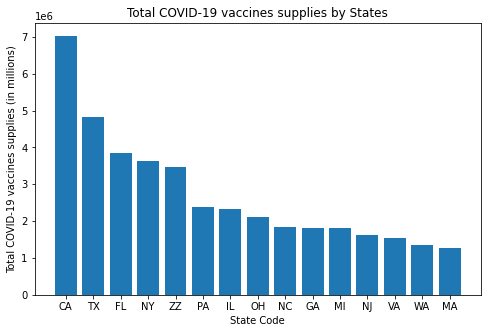

In [135]:
## plot the Country Name vs Total Covid-19 Tests performed Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.

plt.figure(figsize=(8, 5))
plt.bar(sorted_total_doses_df.State_CD[:15], sorted_total_doses_df.Total_Combined_Doses[:15])
plt.xlabel('State Code')
#plt.xticks(rotation=90)
plt.ylabel('Total COVID-19 vaccines supplies (in millions)')
plt.title('Total COVID-19 vaccines supplies by States')
plt.show()

## Looking at the above bar charts, it appears that Top 7 of the States / Entities receiving most COVID-19 vaccines supplies are:

#### 1) California
#### 2) Texas
#### 3) Florida
#### 4) New York
#### 5) Federal Entities
#### 6) Pennsylvenia
#### 7) Illinois

# Copy the the vaccines_final_df DataFrame, which has the cleaned up data, into csv. This csv file will be be used in the final milestone of the project

In [137]:
## write the COVID-19 DataFrame in csv

vaccines_final_df.to_csv("Covid_api_data.csv", index=False)